In [4]:
from PIL import Image
from math import pi, log, exp
import numpy as np

img = Image.open('darwin.png')
img.load()

print(img.size)
print(img.mode)

data = img.getdata()
print(data[2])
a = np.array(img, dtype=np.uint8).reshape(img.size[::-1])
print(a[0,1])

(838, 1024)
L
4
3


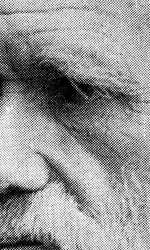

In [12]:
b = a[200:450, 300:450]
pic = Image.fromarray(b)
pic

In [13]:
def blur_py(img, r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8).reshape(h, w)
    b = np.zeros((h,w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            s = 0.
            up, bt = max(i-r,0), min(i+r+1,h)
            lf, rt = max(j-r,0), min(j+r+1,w)
            n = (bt-up)*(rt-lf)
            for y in range(up,bt):
                for x in range(lf,rt):
                    s += a[y,x]
            b[i,j] = s / n
    return Image.fromarray(b)

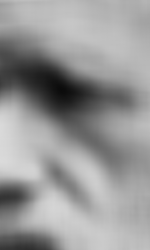

In [29]:
blur_py(pic, 10)

In [31]:
def blur_np(img, r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8)\
                .reshape(h, w)
    b = np.zeros((h,w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            up, bt = max(i-r,0), min(i+r+1,h)
            lf, rt = max(j-r,0), min(j+r+1,w)
            b[i,j] = np.average(a[up:bt, lf:rt])
    return Image.fromarray(b)

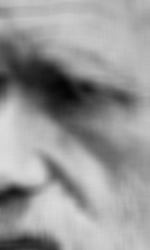

In [34]:
blur_np(pic, 5)

In [41]:
def blur_npnp(img,r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8).reshape(h, w)                                                 
    n = 2*r+1
    shifted = [np.roll(np.roll(a,i//n,axis=0),i%n,axis=1) for i in range(n**2)]
    b = (np.sum(np.stack(shifted), axis=0) / n**2).astype(np.uint8)
    return Image.fromarray(b)

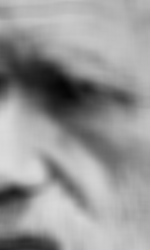

In [35]:
blur_np(pic,6)

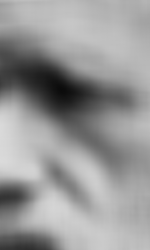

In [36]:
blur_np(pic,10)

In [53]:
img2 = blur_npnp(img,5)

In [54]:
img2.save('darwin2.png')

In [38]:
%timeit(blur_py(pic,6))

2.92 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit(blur_np(pic,6))

700 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%timeit(blur_npnp(pic,6))

27.7 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
r = 3
dx, dy = np.meshgrid(np.arange(-r, +r+1, 1.), np.arange(-r, +r+1, 1.0))
sigma = 0.38*r
gauss_dist = np.exp( -(dx*dx+dy*dy)/(2*sigma**2) ) / (2*pi*sigma**2)
gauss_dist

array([[  1.20345793e-04,   8.23890829e-04,   2.61296096e-03,
          3.83902263e-03,   2.61296096e-03,   8.23890829e-04,
          1.20345793e-04],
       [  8.23890829e-04,   5.64038076e-03,   1.78884073e-02,
          2.62820614e-02,   1.78884073e-02,   5.64038076e-03,
          8.23890829e-04],
       [  2.61296096e-03,   1.78884073e-02,   5.67328926e-02,
          8.33532769e-02,   5.67328926e-02,   1.78884073e-02,
          2.61296096e-03],
       [  3.83902263e-03,   2.62820614e-02,   8.33532769e-02,
          1.22464561e-01,   8.33532769e-02,   2.62820614e-02,
          3.83902263e-03],
       [  2.61296096e-03,   1.78884073e-02,   5.67328926e-02,
          8.33532769e-02,   5.67328926e-02,   1.78884073e-02,
          2.61296096e-03],
       [  8.23890829e-04,   5.64038076e-03,   1.78884073e-02,
          2.62820614e-02,   1.78884073e-02,   5.64038076e-03,
          8.23890829e-04],
       [  1.20345793e-04,   8.23890829e-04,   2.61296096e-03,
          3.83902263e-03,   2.61

In [14]:
coeff = gauss_dist/np.sum(gauss_dist)
coeff

array([[  1.20715357e-04,   8.26420872e-04,   2.62098496e-03,
          3.85081168e-03,   2.62098496e-03,   8.26420872e-04,
          1.20715357e-04],
       [  8.26420872e-04,   5.65770151e-03,   1.79433399e-02,
          2.63627696e-02,   1.79433399e-02,   5.65770151e-03,
          8.26420872e-04],
       [  2.62098496e-03,   1.79433399e-02,   5.69071107e-02,
          8.36092421e-02,   5.69071107e-02,   1.79433399e-02,
          2.62098496e-03],
       [  3.85081168e-03,   2.63627696e-02,   8.36092421e-02,
          1.22840631e-01,   8.36092421e-02,   2.63627696e-02,
          3.85081168e-03],
       [  2.62098496e-03,   1.79433399e-02,   5.69071107e-02,
          8.36092421e-02,   5.69071107e-02,   1.79433399e-02,
          2.62098496e-03],
       [  8.26420872e-04,   5.65770151e-03,   1.79433399e-02,
          2.63627696e-02,   1.79433399e-02,   5.65770151e-03,
          8.26420872e-04],
       [  1.20715357e-04,   8.26420872e-04,   2.62098496e-03,
          3.85081168e-03,   2.62

In [15]:
coeff[3][3]/coeff[0][0]

1017.6056615827617

In [17]:
np.sum(coeff)

1.0